# Data fetching from V1DD physiology data set
## -- the `v1dd_physiology.data_fetching` module
## For locally sparse noise receptive field

In [1]:
import h5py
import v1dd_physiology.data_fetching as daf
import matplotlib.pyplot as plt

## Define root directory

In [2]:
# windows
base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"

# # linux and mac
# base_folder = "/allen/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"

## Define one ROI

In [3]:
mouse_id = '409828'
col_id = '1'
vol_id = '3'
plane_n = 'plane0'
roi_n = 'roi_0086' # 'roi_0016', 'roi_0027', 'roi_0082', 'roi_0086'

## Get the response matrix file object `rm_f`
From the nwb_f file object, the path to corresponding response matrix file can be extracted by `daf.get_rm_path()` function.  
The response matrix file object `rm_f` contains the secondary analysis results, such as spatial receptive field and responses to drifting gratings.

In [4]:
sess_id = f'M{mouse_id}_{col_id}{vol_id}'
nwb_path = daf.get_nwb_path(session_id=sess_id, database_path=base_folder)
nwb_f = h5py.File(nwb_path, 'r')

rm_path = daf.get_rm_path(nwb_f=nwb_f)
print(f'path to response matrix file for session "{sess_id}": \n{rm_path}')

rm_f = h5py.File(rm_path, 'r')

path to response matrix file for session "M409828_13": 
\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data\response_matrices\response_matrix_M409828_13.hdf5


## Get the spatial temporal receptive field `strf` 
## `strf` is a custom object containing a dataframe and some other metadata)
### trace_type
 * `dff`
 * `events`

In [5]:
strf = daf.get_strf(rm_f=rm_f, plane_n=plane_n, roi_n=roi_n, trace_type='dff')
print(type(strf))

<class 'NeuroAnalysisTools.SingleCellAnalysis.SpatialTemporalReceptiveField'>


## `strf.data` is a pandas dataframe which contains the locally sparse noise triggered response

In [6]:
type(strf.data)

pandas.core.frame.DataFrame

In [7]:
strf.data

,altitude,azimuth,sign,traces,trigger_ts
0,-32.599998,-60.500000,-1.0,"[[-0.15983573, 0.033550024, -0.09886566, 0.060...","[635.4347, 2063.0735, 657.93677, 2085.5754, 67..."
1,-32.599998,-60.500000,1.0,"[[0.15428409, 0.10345436, 0.07893874, 0.0, 0.2...","[642.4071, 2070.046, 657.30286, 2084.9417, 666..."
2,-32.599998,-51.200001,-1.0,"[[-0.0021982607, -0.18700105, -0.09513489, -0....","[643.67487, 2071.3137, 654.13354, 2081.7725, 6..."
3,-32.599998,-51.200001,1.0,"[[0.06510079, 0.022443429, -0.0021982607, -0.1...","[643.3579, 2070.9968, 651.5981, 2079.237, 670...."
4,-32.599998,-41.900002,-1.0,"[[0.031145627, 0.029435175, 0.05551903, 0.0341...","[638.604, 2066.243, 656.35205, 2083.991, 661.4..."
...,...,...,...,...,...
219,32.599998,41.900002,1.0,"[[0.15428409, 0.10345436, 0.07893874, 0.0, 0.2...","[642.4071, 2070.046, 657.6198, 2085.2585, 669...."
220,32.599998,51.200001,-1.0,"[[-0.08301812, -0.010166611, -0.014049981, 0.0...","[646.8442, 2074.483, 659.5214, 2087.1602, 660...."
221,32.599998,51.200001,1.0,"[[0.13206492, 0.015199663, 0.031145627, 0.0294...","[638.28705, 2065.9258, 650.3304, 2077.9692, 66..."
222,32.599998,60.500000,-1.0,"[[-0.0021982607, -0.18700105, -0.09513489, -0....","[643.67487, 2071.3137, 658.8875, 2086.5264, 66..."


## For example: the probe number one is a white square at -32.6 altitude -60.5 azimuth. It had been presented 44 times.

In [8]:
probe_ind = 1
sta_single_probe = strf.data.loc[probe_ind, 'traces']
print(f'probe number: {probe_ind}')
print(f'\taltitude: {strf.data.loc[probe_ind, "altitude"]}')
print(f'\tazimuth: {strf.data.loc[probe_ind, "azimuth"]}')
print(f'\tsign: {strf.data.loc[probe_ind, "sign"]}, (1 mean white, -1 means black)')
print(f'\tstim triggered response shape: {sta_single_probe.shape}. (trial x time)')

probe number: 1
	altitude: -32.599998474121094
	azimuth: -60.5
	sign: 1.0, (1 mean white, -1 means black)
	stim triggered response shape: (44, 14). (trial x time)


## `srtf.time` contains the local timestamps of stimulus triggered response

In [9]:
print(strf.time)
print(strf.time.shape)

[-0.66073835 -0.49555373 -0.33036917 -0.16518459  0.          0.16518459
  0.33036917  0.49555373  0.66073835  0.8259229   0.99110746  1.1562921
  1.3214767   1.4866612 ]
(14,)


## This class also provides some convenient function for plotting 

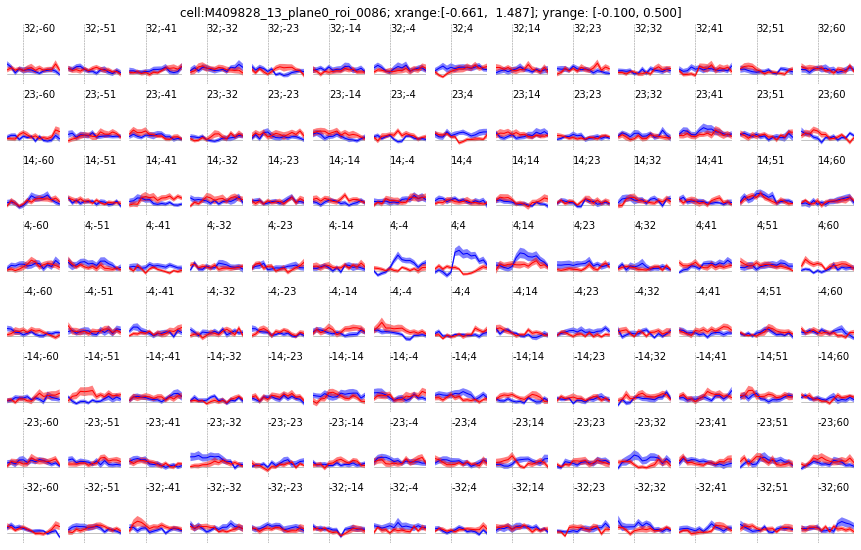

In [10]:
f = plt.figure(figsize=(12, 8))
_ = strf.plot_traces(f=f, yRange=[-0.1, 0.5])

## reduce the dimension and collapse trial response to 2d receptive fields one can use the following methods:

 * `get_amplitude_receptive_field`
 * `get_delta_amplitude_receptive_field`
 * `get_zscore_receptive_field`

For these functions, an input `timeWindow` needs to be passed to define the time window of response. They return 
two receptive field objects (custom class), one for ON response (to white squares) and one for OFF response 
(to black sqares).

In [11]:
rf_df_on, rf_df_off = strf.get_delta_amplitude_receptive_field(timeWindow=[0, 1])

In [12]:
type(rf_df_on)

NeuroAnalysisTools.SingleCellAnalysis.SpatialReceptiveField

## `NeuroAnalysisTools.SingleCellAnalysis.SpatialReceptiveField` contains a sparse 2d matrix and some metadata.

In [13]:
print(f'all altitude positions: \n{rf_df_on.altPos}')
print(f'\nall azimuth positions: \n{rf_df_on.aziPos}')

all altitude positions: 
[ 32.59999847  23.20000076  14.           4.69999981  -4.69999981
 -14.         -23.20000076 -32.59999847]

all azimuth positions: 
[-60.5        -51.20000076 -41.90000153 -32.59999847 -23.20000076
 -14.          -4.69999981   4.69999981  14.          23.20000076
  32.59999847  41.90000153  51.20000076  60.5       ]


## 2d array can be extracted by using `get_weighted_mask()` method

In [14]:
map_df_on = rf_df_on.get_weighted_mask()
print(type(map_df_on))
print(map_df_on.shape)

<class 'numpy.ndarray'>
(8, 14)


## It also provides some useful plotting functions

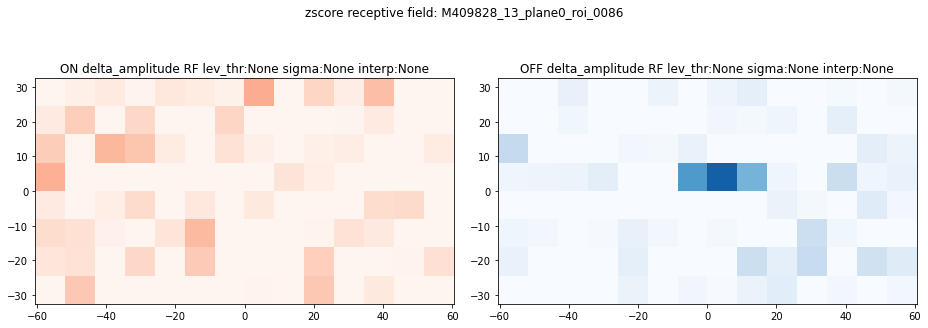

In [15]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
_, f.suptitle(f'zscore receptive field: {sess_id}_{plane_n}_{roi_n}')
_, rf_df_on.plot_rf2(plot_axis=axs[0], cmap='Reds', vmin=0, vmax=0.2)
_, rf_df_off.plot_rf2(plot_axis=axs[1], cmap='Blues', vmin=0, vmax=0.2)
plt.tight_layout()

## Response matrix file also contains another set of receptive field which usses a chi-square based test to define significant pixels (this method is used in our [platform paper](https://www.nature.com/articles/s41593-019-0550-9))

## Inputs:
 * trace_type
     * `dff`
     * `events`  
 
 * alpha (significance level)
     * `0.100`
     * `0.050`

In [16]:
greedy_rf_on, greedy_rf_off = daf.get_greedy_rf(
    rm_f=rm_f, plane_n=plane_n, roi_n=roi_n, trace_type='events', alpha='0.100')

In [17]:
type(greedy_rf_on)

NeuroAnalysisTools.SingleCellAnalysis.SpatialReceptiveField

## The greedy receptive field should have the same dimension as the naive stimulus triggered average maps. The difference is that all the non significant pixels in greedy receptive field are set to be zero.

In [18]:
greedy_map_on = greedy_rf_on.get_weighted_mask()
greedy_map_off = greedy_rf_off.get_weighted_mask()
print(type(greedy_map_on))
print(greedy_map_on.shape)

<class 'numpy.ndarray'>
(8, 14)


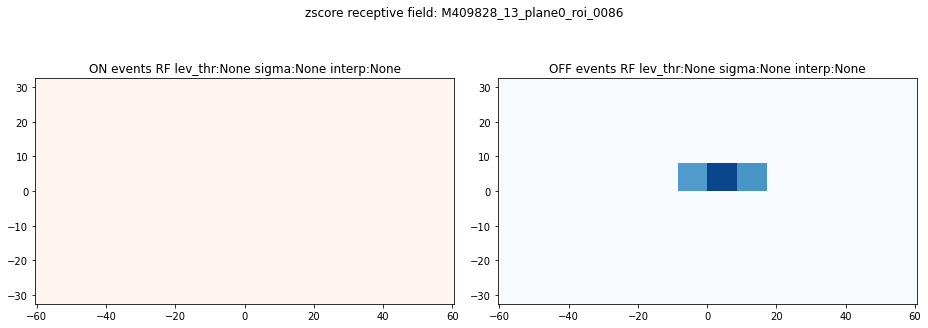

In [19]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
_, f.suptitle(f'zscore receptive field: {sess_id}_{plane_n}_{roi_n}')
_, greedy_rf_on.plot_rf2(plot_axis=axs[0], cmap='Reds', vmin=0, vmax=0.5)
_, greedy_rf_off.plot_rf2(plot_axis=axs[1], cmap='Blues', vmin=0, vmax=0.5)
plt.tight_layout()